In [2]:
pip install jenkspy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement jenkspy (from versions: none)
ERROR: No matching distribution found for jenkspy


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from scipy import stats
import jenkspy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'jenkspy'

In [2]:
df = pd.read_csv('Documents/09. Analysis/rfm_raw_mar_2022.csv')
df.head()

,SKP_CLIENT,RECENCY,FREQUENCY,MONETARY
0,30674291,449,1,87660
1,22804175,6,20,1224801
2,32900748,157,27,1278750
3,23132826,2,1,100000
4,21756795,0,1,364000


In [3]:
df.set_index('SKP_CLIENT', inplace = True)
df.head()

,RECENCY,FREQUENCY,MONETARY
SKP_CLIENT,,,
30674291,449,1,87660
22804175,6,20,1224801
32900748,157,27,1278750
23132826,2,1,100000
21756795,0,1,364000


In [4]:
df['r_percentile'] = df['RECENCY'].rank(pct=True,ascending=False)
# df['r_score'] = pd.qcut(df['r_percentile'], 4, labels=range(4,0,-1))
df['r_score'] = pd.qcut(df['r_percentile'].rank(method='first'), 4, labels=range(4,0,-1))

df['f_percentile'] = df['FREQUENCY'].rank(pct=True,ascending=True)
# df['f_score'] = pd.qcut(df['f_percentile'], 4, labels=range(4,0,-1))
df['f_score'] = pd.qcut(df['f_percentile'].rank(method='first'), 4, labels=range(4,0,-1))

df['m_percentile'] = df['MONETARY'].rank(pct=True,ascending=True)
# df['m_score'] = pd.qcut(df['m_percentile'], 4, labels=range(4,0,-1))
df['m_score'] = pd.qcut(df['m_percentile'].rank(method='first'), 4, labels=range(4,0,-1))

df.head()

,RECENCY,FREQUENCY,MONETARY,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score
SKP_CLIENT,,,,,,,,,
30674291,449,1,87660,0.000111,4,0.219225,4,0.244421,4
22804175,6,20,1224801,0.885290,1,0.964956,1,0.897388,1
32900748,157,27,1278750,0.180609,4,0.981736,1,0.903937,1
23132826,2,1,100000,0.946655,1,0.219225,4,0.262697,3
21756795,0,1,364000,0.988669,1,0.219225,4,0.428231,3


In [ ]:
# df.to_csv('RFM_RESULT_PERC.csv')

In [5]:
df['rfm_score'] = df['r_score'].astype(str) + df['f_score'].astype(str) + df['m_score'].astype(str)
df.head()

,RECENCY,FREQUENCY,MONETARY,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,rfm_score
SKP_CLIENT,,,,,,,,,,
30674291,449,1,87660,0.000111,4,0.219225,4,0.244421,4,444
22804175,6,20,1224801,0.885290,1,0.964956,1,0.897388,1,111
32900748,157,27,1278750,0.180609,4,0.981736,1,0.903937,1,411
23132826,2,1,100000,0.946655,1,0.219225,4,0.262697,3,143
21756795,0,1,364000,0.988669,1,0.219225,4,0.428231,3,143


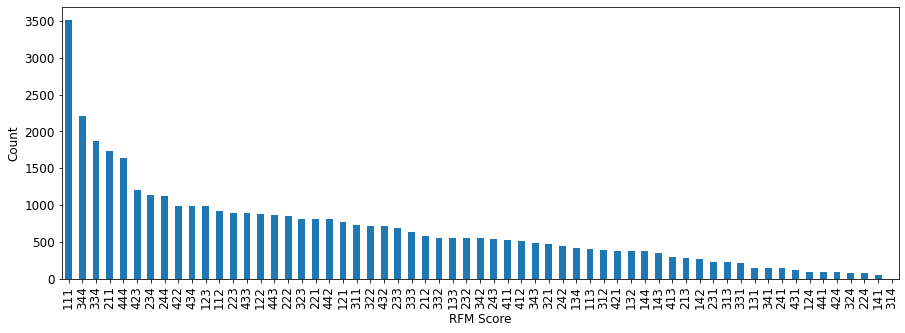

In [6]:
ax = df['rfm_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [7]:
r_quarters = df['RECENCY'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
f_quarters = df['FREQUENCY'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
m_quarters = df['MONETARY'].quantile(q=[0.0, 0.25,0.5,0.75, 1]).to_list()
quartile_spread = pd.DataFrame(list(zip(r_quarters, f_quarters, m_quarters)), 
                               columns=['Q_Recency','Q_Frequency', 'Q_Monetary'],
                               index = ['min', 'first_part','second_part','third_part', 'max'])
quartile_spread

,Q_Recency,Q_Frequency,Q_Monetary
min,0.0,1.0,10000.0
first_part,19.0,1.0,95000.0
second_part,58.0,2.0,398500.0
third_part,127.0,5.0,700552.0
max,454.0,231.0,15250596.0


In [8]:
r_breaks = jenkspy.jenks_breaks(df['RECENCY'], nb_class=4)
f_breaks = jenkspy.jenks_breaks(df['FREQUENCY'], nb_class=4)
m_breaks = jenkspy.jenks_breaks(df['MONETARY'], nb_class=4)
jenks_spread = pd.DataFrame(list(zip(r_breaks, f_breaks, m_breaks)), 
                            columns=['J_Recency','J_Frequency', 'J_Monetary'],
                            index = ['min', 'first_part','second_part','third_part', 'max'])
jenks_spread

,J_Recency,J_Frequency,J_Monetary
min,0.0,1.0,10000.0
first_part,56.0,5.0,309040.0
second_part,134.0,16.0,955000.0
third_part,242.0,38.0,2275600.0
max,454.0,231.0,15250596.0


In [9]:
df_compare = pd.concat([quartile_spread, jenks_spread], axis=1)
cols = ['Q_Recency', 'J_Recency','Q_Frequency', 'J_Frequency','Q_Monetary', 'J_Monetary']
df_compare[cols]

,Q_Recency,J_Recency,Q_Frequency,J_Frequency,Q_Monetary,J_Monetary
min,0.0,0.0,1.0,1.0,10000.0,10000.0
first_part,19.0,56.0,1.0,5.0,95000.0,309040.0
second_part,58.0,134.0,2.0,16.0,398500.0,955000.0
third_part,127.0,242.0,5.0,38.0,700552.0,2275600.0
max,454.0,454.0,231.0,231.0,15250596.0,15250596.0


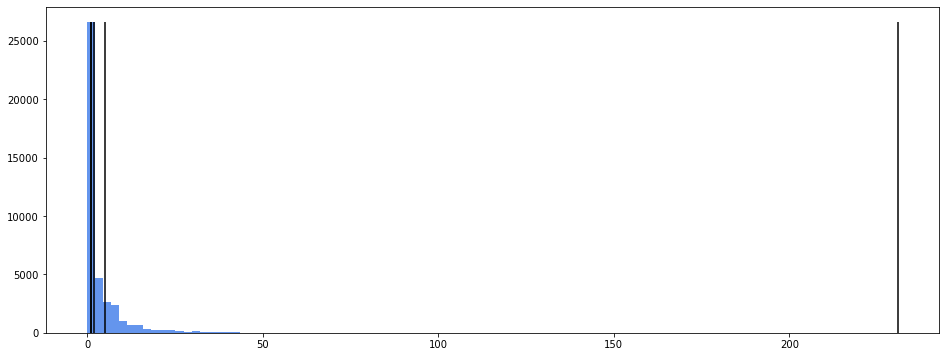

In [13]:
plt.figure(figsize = (16,6))
hist = plt.hist(df['FREQUENCY'], bins=100, align='left', color='cornflowerblue')
for q in f_quarters:
    plt.vlines(q, 
               ymin=0, 
               ymax = max(hist[0]),
               colors='black'
              )

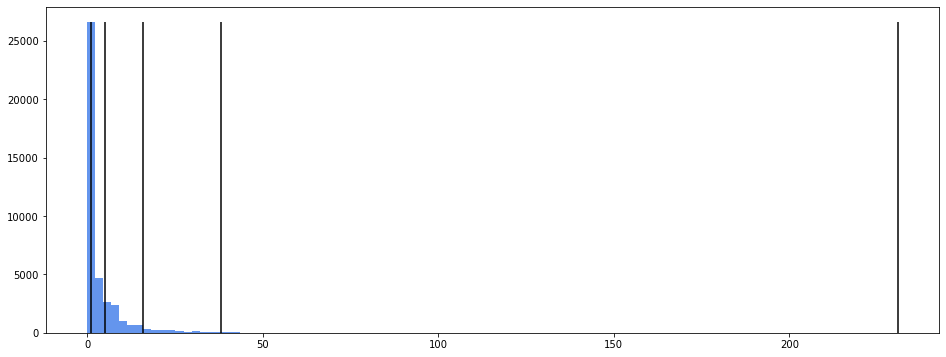

In [12]:
plt.figure(figsize = (16,6))
hist = plt.hist(df['FREQUENCY'], bins=100, align='left', color='cornflowerblue')
for b in f_breaks:
    plt.vlines(b, 
               ymin=0, 
               ymax = max(hist[0]),
               colors='black'
              )

In [ ]:
plt.figure(figsize = (16,6))
hist = plt.hist(df['RECENCY'], bins=100, align='left', color='cornflowerblue')
for b in f_breaks:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

In [ ]:
plt.figure(figsize = (16,6))
hist = plt.hist(df['MONETARY'], bins=100, align='left', color='cornflowerblue')
for b in f_breaks:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

In [ ]:
def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenkspy.jenks_breaks(array, nb_class=classes)

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

In [ ]:
my_dict = {}
for col in df.columns[:3]:
    results = []
    for i in range(2, 10):
        results.append(goodness_of_variance_fit(df[col].values, i))
    my_dict[col] = results  
    
plt.plot(range(2, 10), my_dict['RECENCY'], label='RECENCY')
plt.plot(range(2, 10), my_dict['FREQUENCY'], label='FREQUENCY')
plt.plot(range(2, 10), my_dict['MONETARY'], label='MONETARY')
plt.xlabel('Number of classes')
plt.ylabel('Goodness of Variance Fit')
plt.legend(loc='best')
plt.show()

In [ ]:
breaks_list = [r_breaks, f_breaks, m_breaks]

df['r_j_score'] = pd.cut(df['RECENCY'], bins=r_breaks, labels=[1, 2, 3, 4], include_lowest=True)
df['f_j_score'] = pd.cut(df['FREQUENCY'], bins=f_breaks, labels=[4, 3, 2, 1], include_lowest=True)
df['m_j_score'] = pd.cut(df['MONETARY'], bins=m_breaks, labels=[4, 3, 2, 1], include_lowest=True)

df.drop(['r_percentile', 'f_percentile', 'm_percentile'], axis=1, inplace=True)
df.head()

In [ ]:
df['rfm_j_score'] = df['r_j_score'].astype(str) + df['f_j_score'].astype(str) + df['m_j_score'].astype(str)
df.head()

In [ ]:
df_j = df['rfm_j_score'].value_counts().to_frame().join(df['rfm_score'].value_counts())
ax = df_j.plot(kind='bar', title ="Jenks vs Quartiles", figsize=(15, 5), legend=True, fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [14]:
# df.to_csv('RFM_RESULT_MARCH2022.csv')
df

,RECENCY,FREQUENCY,MONETARY,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,rfm_score
SKP_CLIENT,,,,,,,,,,
30674291,449,1,87660,0.000111,4,0.219225,4,0.244421,4,444
22804175,6,20,1224801,0.885290,1,0.964956,1,0.897388,1,111
32900748,157,27,1278750,0.180609,4,0.981736,1,0.903937,1,411
23132826,2,1,100000,0.946655,1,0.219225,4,0.262697,3,143
21756795,0,1,364000,0.988669,1,0.219225,4,0.428231,3,143
...,...,...,...,...,...,...,...,...,...,...
23861737,2,1,10936,0.946655,1,0.219225,3,0.076490,4,134
3426270,20,1,20800,0.742963,2,0.219225,3,0.179176,4,234
39184090,69,1,10886,0.454415,3,0.219225,3,0.062254,4,334


### PART II

In [1]:
import pandas as pd
import time
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
df_rfm = pd.read_csv('C:/Users/Laroybafi.Ramadhano/Desktop/22. RFM cluster/rfm_selection_230801.csv')
df_rfm.head()

,CALC_DATE,INSERT_TS,PRODUCT_GROUPING,DATE_ACTIVE,CUID,TEXT_CONTRACT_NUMBER,SKP_CLIENT,LAST_TX_DATE,MOB,RECENCY,FREQUENCY,MONETARY
0,2023-08-18,2023-08-18,PLT,2020-12-01,3500326,4003329475,12666662,2020-12-02,32,989,1,49900
1,2023-08-18,2023-08-18,PLT,2020-12-17,11879129,4003460466,33171121,2021-07-18,32,761,28,1648967
2,2023-08-18,2023-08-18,PLT,2020-12-24,8788265,4003521169,28481035,2020-12-29,32,962,4,400000
3,2023-08-18,2023-08-18,PLT,2020-12-30,8986753,4003575039,29028269,2023-02-12,32,187,6,805000
4,2023-08-18,2023-08-18,PLT,2021-01-07,4231652,4100060940,14169102,2021-01-19,31,941,4,386200


In [6]:
df_rfm.dtypes

CALC_DATE               object
INSERT_TS               object
PRODUCT_GROUPING        object
DATE_ACTIVE             object
CUID                     int64
TEXT_CONTRACT_NUMBER     int64
SKP_CLIENT               int64
LAST_TX_DATE            object
MOB                      int64
RECENCY                  int64
FREQUENCY                int64
MONETARY                 int64
dtype: object

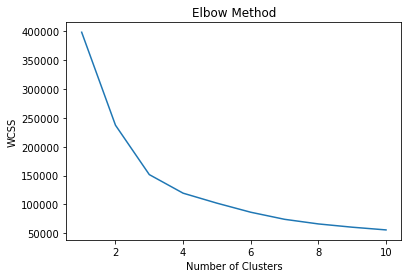

In [7]:
from sklearn.cluster import KMeans

# Select relevant features
X = df_rfm[['RECENCY', 'FREQUENCY', 'MONETARY']]

# Standardize features
X = (X - X.mean()) / X.std()

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Perform K-means clustering with optimal number of clusters
n_clusters = 3  # replace with elbow method result
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to data
df_rfm['SEGMENT_NAME'] = y_kmeans

# Analyze clusters
for i in range(n_clusters):
    print(f'Cluster {i}')
    print(df_rfm[df_rfm['SEGMENT_NAME'] == i].describe())

Cluster 0
               CUID  TEXT_CONTRACT_NUMBER    SKP_CLIENT           MOB  \
count  6.361200e+04          6.361200e+04  6.361200e+04  63612.000000   
mean   1.370996e+07          4.182486e+09  2.715483e+07     16.243508   
std    1.268242e+07          6.991257e+07  1.582929e+07      8.204252   
min    1.253100e+04          4.003296e+09  7.600000e+01      0.000000   
25%    3.774096e+06          4.102384e+09  1.320503e+07     10.000000   
50%    8.229226e+06          4.200772e+09  2.708004e+07     16.000000   
75%    2.331973e+07          4.202425e+09  4.091349e+07     22.000000   
max    4.808802e+07          4.301399e+09  5.584607e+07     33.000000   

            RECENCY     FREQUENCY      MONETARY  SEGMENT_NAME  
count  63612.000000  63612.000000  6.361200e+04       63612.0  
mean      89.494199     14.114570  1.382391e+06           0.0  
std       91.628962     11.451259  1.077975e+06           0.0  
min        1.000000      1.000000  1.000000e+04           0.0  
25%       14

In [9]:
df_rfm.tail()

,CALC_DATE,INSERT_TS,PRODUCT_GROUPING,DATE_ACTIVE,CUID,TEXT_CONTRACT_NUMBER,SKP_CLIENT,LAST_TX_DATE,MOB,RECENCY,FREQUENCY,MONETARY,SEGMENT_NAME
132800,2023-08-18,2023-08-18,PLT,2023-01-08,37232162,4300052641,50308921,2023-08-17,7,1,1,200000,0
132801,2023-08-18,2023-08-18,PLX,2023-07-07,32720919,4301139585,47671374,2023-08-17,1,1,1,100400,0
132802,2023-08-18,2023-08-18,PLX,2022-10-04,8858038,4202279443,28669685,2023-08-17,10,1,1,385450,0
132803,2023-08-18,2023-08-18,PLT,2022-01-03,1974011,4200018523,9437303,2023-08-17,19,1,1,501000,0
132804,2023-08-18,2023-08-18,PLX,2023-07-06,28680059,4301135924,45221129,2023-08-17,1,1,1,57500,0


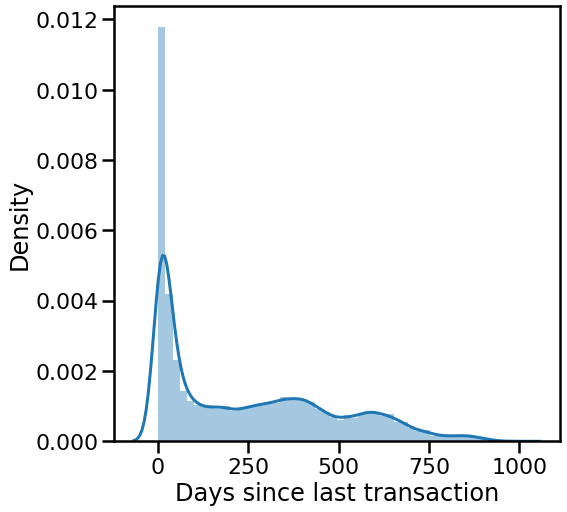

In [10]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    plt.figure(figsize=(8,8))
    sns.set_context("poster")
    sns.distplot(df_rfm['RECENCY'])
    plt.xlabel('Days since last transaction')

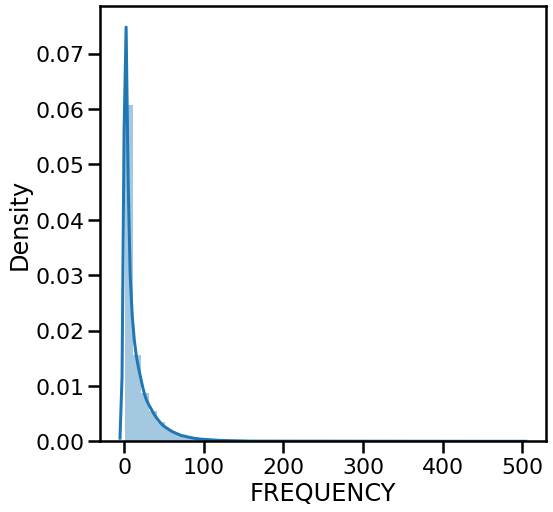

In [11]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")


    plt.figure(figsize=(8,8))
    sns.set_context("poster")
    sns.distplot(df_rfm['FREQUENCY'])

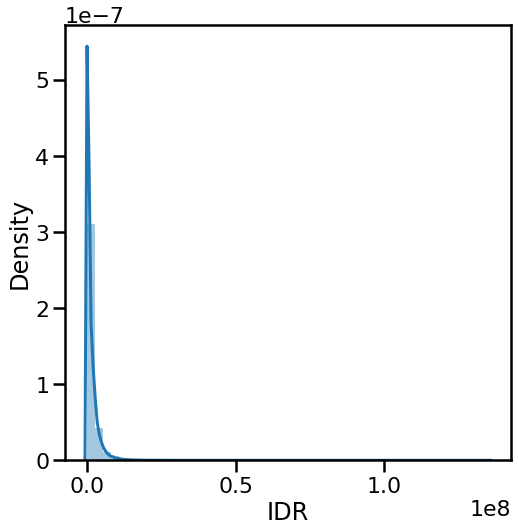

In [12]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    plt.figure(figsize=(8,8))
    sns.set_context("poster")
    sns.distplot(df_rfm['MONETARY'])
    plt.xlabel('IDR')

#### Let’s use quantiles to split data into 3 categories since we will use RFM scale of 3

In [13]:
df_rfm.quantile([.33, .66, 1], axis=0)

,CUID,TEXT_CONTRACT_NUMBER,SKP_CLIENT,MOB,RECENCY,FREQUENCY,MONETARY,SEGMENT_NAME
0.33,4999118.36,4.102574e+09,15842215.12,15.0,46.0,3.0,400000.0,0.0
0.66,13627947.08,4.201033e+09,34631016.20,21.0,346.0,13.0,1352066.6,2.0
1.00,48088025.00,4.301399e+09,55846067.00,33.0,989.0,498.0,135210665.0,2.0


In [14]:
RFMscores = df_rfm.copy()

In [15]:
RFMscores['RECENCY_SCORE']    = pd.qcut(RFMscores['RECENCY'], 3, labels=[3, 2, 1])
RFMscores['FREQUENCY_SCORE']  = pd.qcut(RFMscores['FREQUENCY'], 3, labels=[1, 2, 3])
RFMscores['MONETARY_SCORE']   = pd.qcut(RFMscores['MONETARY'], 3, labels=[1, 2, 3])

In [16]:
RFMscores.head()

,CALC_DATE,INSERT_TS,PRODUCT_GROUPING,DATE_ACTIVE,CUID,TEXT_CONTRACT_NUMBER,SKP_CLIENT,LAST_TX_DATE,MOB,RECENCY,FREQUENCY,MONETARY,SEGMENT_NAME,RECENCY_SCORE,FREQUENCY_SCORE,MONETARY_SCORE
0,2023-08-18,2023-08-18,PLT,2020-12-01,3500326,4003329475,12666662,2020-12-02,32,989,1,49900,2,1,1,1
1,2023-08-18,2023-08-18,PLT,2020-12-17,11879129,4003460466,33171121,2021-07-18,32,761,28,1648967,2,1,3,3
2,2023-08-18,2023-08-18,PLT,2020-12-24,8788265,4003521169,28481035,2020-12-29,32,962,4,400000,2,1,2,1
3,2023-08-18,2023-08-18,PLT,2020-12-30,8986753,4003575039,29028269,2023-02-12,32,187,6,805000,0,2,2,2
4,2023-08-18,2023-08-18,PLT,2021-01-07,4231652,4100060940,14169102,2021-01-19,31,941,4,386200,2,1,2,1


In [17]:
# RFMscores = RFMscores.drop('FREQUEMCY_SCORE', axis=1)

In [17]:
# RFMscores = RFMscores.reset_index()
# Convert data type
RFMscores['RECENCY_SCORE'] = RFMscores.RECENCY_SCORE.astype(int)
RFMscores['FREQUENCY_SCORE'] = RFMscores.FREQUENCY_SCORE.astype(int)
RFMscores['MONETARY_SCORE'] = RFMscores.MONETARY_SCORE.astype(int)

In [18]:
RFMscores['RFM_SCORE'] = RFMscores['RECENCY_SCORE'].map(str) + RFMscores['FREQUENCY_SCORE'].map(str) + RFMscores['MONETARY_SCORE'].map(str)

In [19]:
# url2 = "https://gitlab.com/priagungkhusuma/rfm_segmentation/-/raw/master/rfm_score_dim.csv"

# rfm_score_reference = pd.read_csv(StringIO(requests.get(url2).text), error_bad_lines=False)
# rfm_score_reference['rfm_score'] = rfm_score_reference.rfm_score.map(str)

rfm_score_reference = pd.read_csv('C:/Users/Laroybafi.Ramadhano/Desktop/22. RFM cluster/rfm_type.csv')
rfm_score_reference.head()

,segment_name,rfm_score
0,ABOUT TO SLEEP,112
1,ABOUT TO SLEEP,113
2,ABOUT TO SLEEP,121
3,ABOUT TO SLEEP,122
4,ABOUT TO SLEEP,131


In [20]:
rfm_score_reference.rename(columns = {'rfm_score':'RFM_SCORE', 'segment_name':'SEGMENT_NAME'}, inplace = True)
rfm_score_reference.head()

,SEGMENT_NAME,RFM_SCORE
0,ABOUT TO SLEEP,112
1,ABOUT TO SLEEP,113
2,ABOUT TO SLEEP,121
3,ABOUT TO SLEEP,122
4,ABOUT TO SLEEP,131


In [17]:
# rfm_score_reference.dtypes

SEGMENT_NAME    object
RFM_SCORE        int64
dtype: object

In [21]:
rfm_score_reference['RFM_SCORE'] = rfm_score_reference['RFM_SCORE'].apply(str)
rfm_score_reference.dtypes

SEGMENT_NAME    object
RFM_SCORE       object
dtype: object

In [22]:
RFMscores = pd.merge(RFMscores, rfm_score_reference, on=['RFM_SCORE'])
# Save it as csv file
RFMscores.to_csv('C:/Users/Laroybafi.Ramadhano/Desktop/22. RFM cluster/rfm_output_230801.csv')

In [23]:
RFMscores.head()


,CALC_DATE,INSERT_TS,PRODUCT_GROUPING,DATE_ACTIVE,CUID,TEXT_CONTRACT_NUMBER,SKP_CLIENT,LAST_TX_DATE,MOB,RECENCY,FREQUENCY,MONETARY,SEGMENT_NAME_x,RECENCY_SCORE,FREQUENCY_SCORE,MONETARY_SCORE,RFM_SCORE,SEGMENT_NAME_y
0,2023-08-18,2023-08-18,PLT,2020-12-01,3500326,4003329475,12666662,2020-12-02,32,989,1,49900,2,1,1,1,111,LOST CUSTOMER
1,2023-08-18,2023-08-18,PLT,2021-02-05,7281858,4100274917,24892954,2021-02-05,30,924,1,45000,2,1,1,1,111,LOST CUSTOMER
2,2023-08-18,2023-08-18,PLT,2021-01-16,12013347,4100123808,33277462,2021-02-06,31,923,1,59000,2,1,1,1,111,LOST CUSTOMER
3,2023-08-18,2023-08-18,PLT,2021-02-08,9644529,4100305131,30662691,2021-02-08,30,921,1,368990,2,1,1,1,111,LOST CUSTOMER
4,2023-08-18,2023-08-18,PLT,2021-02-08,6144227,4100303099,22495126,2021-02-12,30,917,1,15400,2,1,1,1,111,LOST CUSTOMER


In [32]:
# pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [24]:
import squarify 

In [25]:
RFMscores.head()

,CALC_DATE,INSERT_TS,PRODUCT_GROUPING,DATE_ACTIVE,CUID,TEXT_CONTRACT_NUMBER,SKP_CLIENT,LAST_TX_DATE,MOB,RECENCY,FREQUENCY,MONETARY,SEGMENT_NAME_x,RECENCY_SCORE,FREQUENCY_SCORE,MONETARY_SCORE,RFM_SCORE,SEGMENT_NAME_y
0,2023-08-18,2023-08-18,PLT,2020-12-01,3500326,4003329475,12666662,2020-12-02,32,989,1,49900,2,1,1,1,111,LOST CUSTOMER
1,2023-08-18,2023-08-18,PLT,2021-02-05,7281858,4100274917,24892954,2021-02-05,30,924,1,45000,2,1,1,1,111,LOST CUSTOMER
2,2023-08-18,2023-08-18,PLT,2021-01-16,12013347,4100123808,33277462,2021-02-06,31,923,1,59000,2,1,1,1,111,LOST CUSTOMER
3,2023-08-18,2023-08-18,PLT,2021-02-08,9644529,4100305131,30662691,2021-02-08,30,921,1,368990,2,1,1,1,111,LOST CUSTOMER
4,2023-08-18,2023-08-18,PLT,2021-02-08,6144227,4100303099,22495126,2021-02-12,30,917,1,15400,2,1,1,1,111,LOST CUSTOMER


In [26]:
n = RFMscores.groupby('SEGMENT_NAME_x').agg(
        {'TEXT_CONTRACT_NUMBER':'size', 
         'RECENCY':'median', 
         'FREQUENCY':'median', 
         'MONETARY':'median'}).rename(columns={'TEXT_CONTRACT_NUMBER':'COUNT','RECENCY':'MEDIAN_RECENCY','FREQUENCY':'MEDIAN_FREQUENCY','MONETARY':'MEDIAN_MONETARY'}).reset_index()
n

,SEGMENT_NAME_x,COUNT,MEDIAN_RECENCY,MEDIAN_FREQUENCY,MEDIAN_MONETARY
0,0,63612,49.0,11.0,1141492.5
1,1,15527,12.0,53.0,4579995.0
2,2,53666,469.0,2.0,372399.0


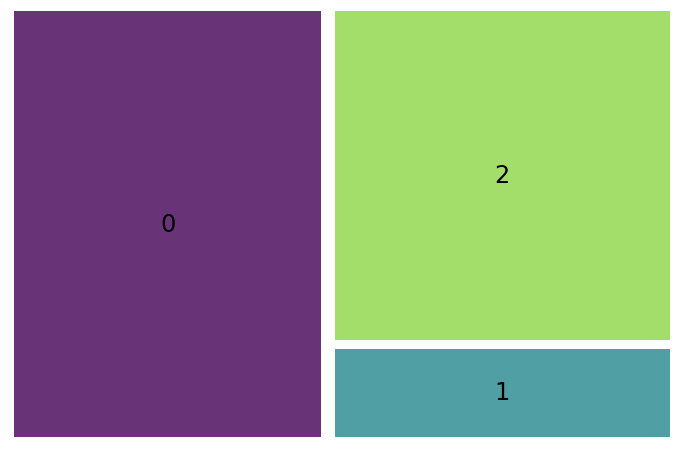

In [27]:
plt.figure(figsize=(12,8))

sizes = n['COUNT']
squarify.plot(sizes, value=n.SEGMENT_NAME_x, alpha=0.8, pad=True)

plt.axis('off')
plt.show()